# DBZ Power Level Project
This notebook is meant to be a fun experiment to build learning on the basics of machine learning.

## Load Data Set
Loading the data set which we received from Kaggle. Data needed to go through a couple of phases of preprocessing which can be seen in the Data Preprocessing section.

In [7]:
import pandas as pd
df = pd.read_csv ("Data/Dragon_Ball_Data_Set.csv")
df

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball
...,...,...,...,...
1239,Goku (MSSJ with SSJG's power),"22,400,000,000,000",Movie 14: Battle of Gods,Dragon Ball Z
1240,Goku (SSJG),"224,000,000,000,000",Movie 14: Battle of Gods,Dragon Ball Z
1241,Goku,"44,800,000,000",Movie 14: Battle of Gods,Dragon Ball Z
1242,"Beerus (full power, never shown)","896,000,000,000,000",Movie 14: Battle of Gods,Dragon Ball Z


## Data Preprocessing 
Implementing a form of data preprocessing to remove anomalies of character power levels within the dataset.

In [8]:
df = df [~df["Power_Level"].str.contains("(supressed figting Trunks)")]

/var/folders/16/4nzt98916c34lwlbh3f81k2r0000gn/T/ipykernel_94471/3435884438.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df [~df["Power_Level"].str.contains("(supressed figting Trunks)")]


Some values in the data had different syntaxs. For example, one power level was noted as "85" while another was noted as "820,000". I decided to remove all the commas from the values to fix the "ValueError".

In [9]:
df ["Power_Level"] = df ["Power_Level"].str.replace(",","") #removing commas from power level dataset
df ["Power_Level"] = pd.to_numeric(df ["Power_Level"],errors="coerce") #method to convert power level column to numeric values

Noticed that single digit power levels were not being converted to numeric values correctly. I will now aim to fix this in the preprocessing section

In [10]:
def convert_to_numeric(value):
    try: 
        return float(value)
    except ValueError:
        if value.isdigit(): #If it is a number in string format
            return float(value)
        else:
            return None
        
df ["Power_Level"] = df ["Power_Level"].apply(convert_to_numeric)

## Data Analysis

In [11]:
summary = df.describe()
#saga_power_levels = df.groupby("Saga_or_Movie")["Power_Level"].mean()
character_power_levels_per_saga = df.groupby("Character")["Power_Level"].mean()


- df.describe was used to generate descriptive statistics for the data frame. Good practice to store value in summary variable for when conducting exploratory analysis.
- The "groupby" method was used to split the data into different groups, "Saga" and "Character"

# Data Visualisation 
Will now attempt to visualise the data using matplotlib, numpy and seaborn

/var/folders/16/4nzt98916c34lwlbh3f81k2r0000gn/T/ipykernel_94471/2419284027.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize= 10)
/var/folders/16/4nzt98916c34lwlbh3f81k2r0000gn/T/ipykernel_94471/2419284027.py:24: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, None)


<function matplotlib.pyplot.show(close=None, block=None)>

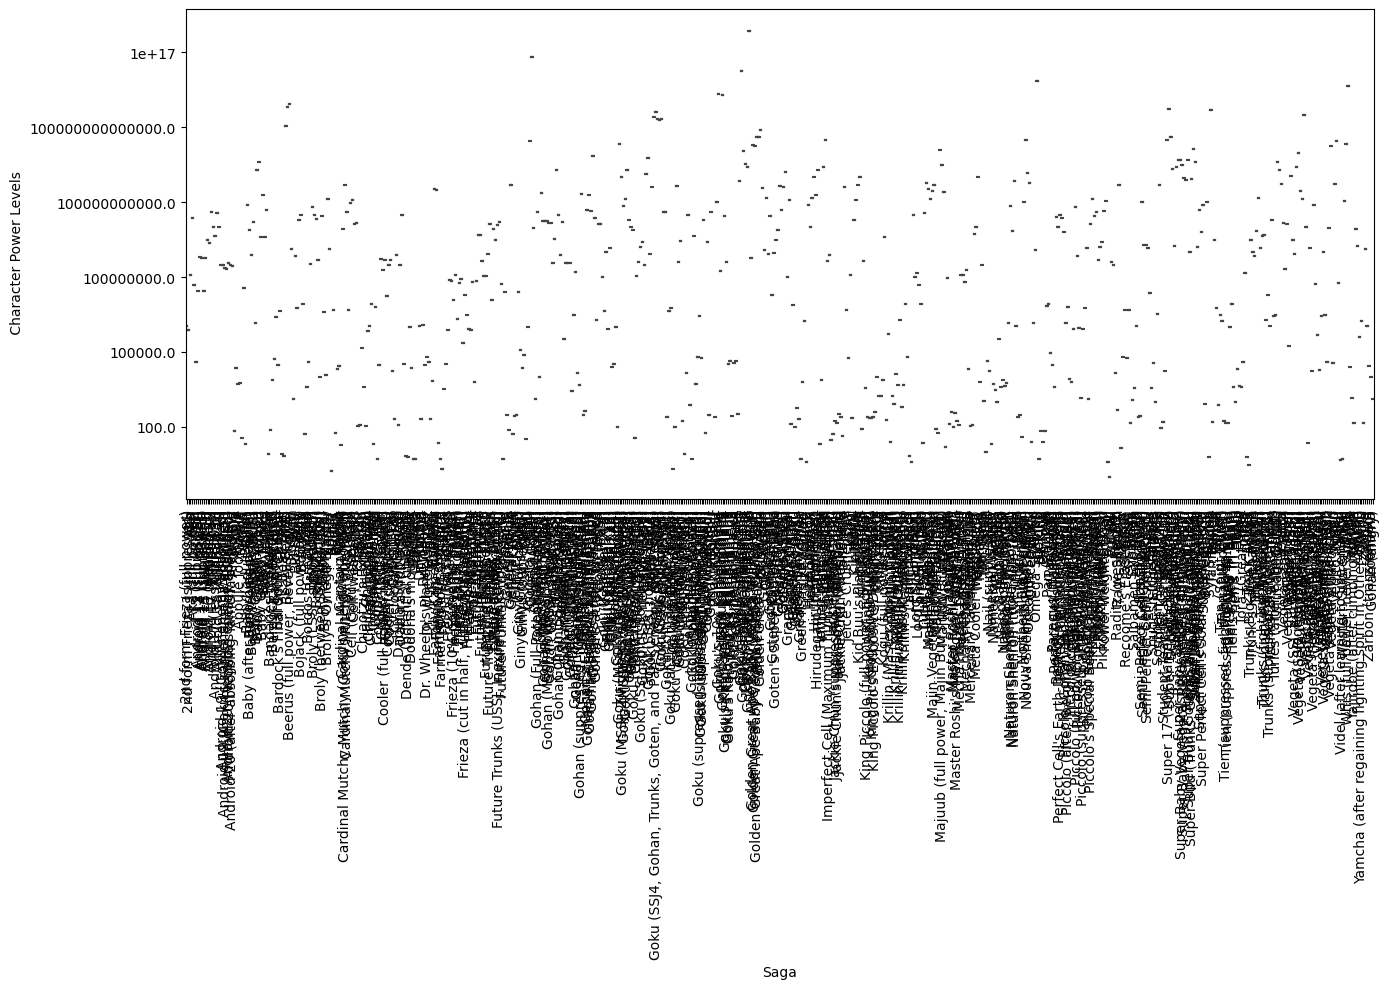

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

character_power_levels_per_saga = character_power_levels_per_saga.apply(np.mean)

power_levels_df = pd.DataFrame({
    "Saga" : character_power_levels_per_saga.index,
    "Character Power Levels" : character_power_levels_per_saga.values
})

power_levels_df["Character Power Levels"] = power_levels_df ["Character Power Levels"].apply(lambda x: [float(values) for values in x]
if isinstance(x, list) else float(x)
)

plt.figure(figsize = (14,10)) #set figure size
ax = sns.boxplot( x = "Saga", y = "Character Power Levels", data = power_levels_df) #create box plot
ax.set_xlabel("Saga")
ax.set_yscale("log")
ax.set_ylabel (" Character Power Levels")
ax.set_yticklabels(ax.get_yticks(), fontsize= 10)
ax.set_title = ("Distribution of Character Power Levels per Saga")
plt.xticks(rotation=90)
plt.ylim(0, None)
plt.tight_layout()
plt.show

# data_per_saga = pd.DataFrame({
#     "Saga": character_power_levels_per_saga.index
#     "Character": character_power_levels_per_saga.values
# })

# fig, axes = plt.subplots(nrows = len(data_per_saga), figsize = (14,10*len(data_per_saga)))
# for i, row in data_per_saga.iterrows()
# sns.boxplot( ax =axes[i])



## Creating Subplots for each Saga

In [29]:
dataset_path = pd.read_csv("Data/Dragon_Ball_Data_Set.csv")
data = pd.read_csv(dataset_path)
character_names = data["Character"].unique()

character_power_levels = pd.DataFrame({
    "Character": "character_names"
    "Saga": "Saga_or_Movie",
    "Character Power Level": [1000]*len(character_names)
})

sagas = character_power_levels["Saga"].unique()
num_sagas = len(sagas)
character_power_levels_per_saga = character_power_levels.apply[lambda x = [x]]
fig, axes = plt.subplots(num_sagas, figsize=(12, 8*num_sagas))


for i, (saga, ax) in enumerate(zip(sagas, axes)):

    ax.boxplot(x = "Character", y = "Character Power Levels", data=saga_data, ax=ax)
    ax.set_yscale("log")

    ax.set_xlabel("Character", fontsize=14)
    ax.set_ylabel("Character Power Level", fontsize=14)
    ax.set_title(f"Distribution of Character Power Levels - {saga}", fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
if num_sagas < len(axes):
    for j in range(num_sagas, len(axes)):
        fig.delaxes(axes[j])


plt.tight_layout()
plt.show()




NameError: name 'character_power_levels' is not defined